In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import _arma_predict_out_of_sample
from statsmodels.tsa.stattools import acf, pacf, adfuller
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf

In [2]:
opzones = pd.read_csv('./datain/Required_opzone.csv')
opzones = opzones[opzones.OPZONE_CDE != 'ZHJ']
opzones_list_tmp = opzones[['OPZONE_CDE']]
opzones_list = opzones_list_tmp['OPZONE_CDE'] 


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('./datain/2012-201640.csv', parse_dates=[0], dtype={'DATE': str}, date_parser=dateparse)
data.set_index(keys=['DATE'], drop=True,inplace=True)

In [5]:
for opzone in opzones_list:
    sizetype = '40GP'
    df = data[ (data.OPZONE_CDE==opzone) & (data.EQP_SIZE_TYPE == sizetype) ]
    df_RLS = df[['MT_RLS']]
    df_RTN = df[['MT_RTN']]
    df_RLS.sort_index(inplace=True, ascending=True)
    df_RTN.sort_index( inplace=True, ascending=True)
    df_RLS_TS = df_RLS['MT_RLS'] 
    df_RTN_TS = df_RTN['MT_RTN']
    result = pd.DataFrame(columns=('1wk', '2wk', '3wk','4wk', '5wk'))
    
    for n in range(0,53):
        y = df_RTN_TS[0 :-53 + n]

        try:
            res = ARIMA(y, order=(2, 1, 2)).fit(trend="nc")
        except:
            try:
                res = ARIMA(y, order=(2, 1, 1)).fit(trend="nc")
            except:
                try:
                    res = ARIMA(y, order=(1, 1, 2)).fit(trend="nc")
                except:
                    try:
                        res = ARIMA(y, order=(1, 1, 1)).fit(trend="nc")
                    except:
                        print ("invertiable error occured.")
    
        predication = res.forecast(5)[0]
        result.loc[n] = [predication[0],predication[1],predication[2],predication[3],predication[4]] 
        
    result['OPZONE_CODE'] = opzone
    result['SIZE_TYPE'] = sizetype
    df_temp = pd.DataFrame(df_RTN_TS[-53:])
    result.index = df_temp.index
    df_temp1 = pd.concat([result, df_temp], axis=1)
    df_temp1['2wk'] = df_temp1['2wk'].shift(1)
    df_temp1['3wk'] = df_temp1['2wk'].shift(2)
    df_temp1['4wk'] = df_temp1['2wk'].shift(3)
    df_temp1['5wk'] = df_temp1['2wk'].shift(4)
    df_temp1
    df_temp1.to_csv('./dataout/export_arima_40GP_MTRTN.csv', mode='a', header=False)

/home/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
invertiable error occured.
i

/home/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

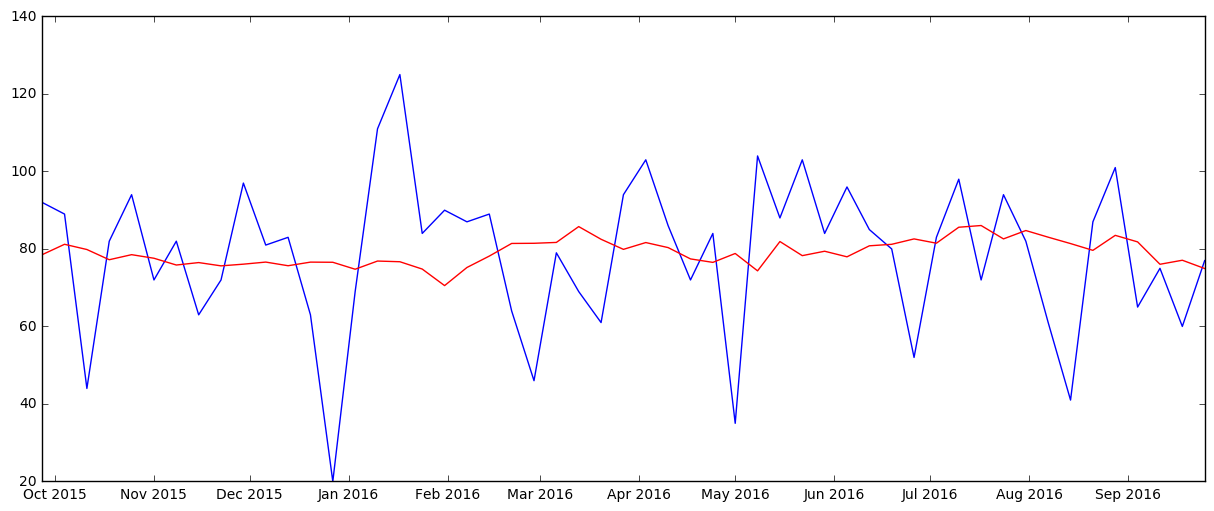

In [8]:
#df_temp1.head(10)
#Cross check result
plt.plot(df_temp1['MT_RTN'],color='blue')
plt.plot(df_temp1['1wk'],color='red')
plt.show()